In [1]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns


In [3]:
# Using the standardized dataset to train and test the model
df = pd.read_csv('std_df_full.csv', index_col = 0)


In [4]:
print(df.keys())

Index(['vaxView', 'year', 'value', 'lowerLimit', 'upperLimit', 'sampleSize',
       'confidenceInterval', 'demographicClass', 'upperError', 'lowerError'],
      dtype='object')


In [5]:
# Splitting the data into training and testing datasets 
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)


In [6]:
# Separating the training set into target and predictor variables
y_train = df_train.pop('value')
x_train = df_train


In [7]:
# Building a model with all the variables
x_train_lin_model = sm.add_constant(x_train)
limmodel_full = sm.OLS(y_train, x_train_lin_model).fit()
limmodel_full.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.401e+23
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:28:46   Log-Likelihood:                 25597.
No. Observations:                1265   AIC:                        -5.118e+04
Df Residuals:                    1256   BIC:                        -5.113e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.9237   3.99e-09   1.74e+09      0.000       6.924       6.924
vaxView             4.818e-14   4.97e-11      0.001      0.999   -9.75e-11    9.76e-11
year               -1.968e-13   1.99e-12     -0.099      0.921    -4.1e-12    3.71e-12
lowerLimit            43.5619   2.25e-10   1.94e+11      0.000      43.562      43.562
upperLimit            49.0679   2.54e-10   1.93e+11      0.000      49.068      49.068
sampleSize         -6.306e-14   2.73e-10     -0.000      1.000   -5.36e-10    5.36e-10
confidenceInterval  2.132e-13   1.33e-09      0.000      1.000   -2.61e-09    2.61e-09
demographicClass    3.331e-14   4.96e-11      0.001      0.999   -9.73e-11    9.73e-11
upperError           -13.9659   7.77e-10   -1.8e+10      0.000     -13.966     -13.966
lowerError            19.2472   5.86e-10   3.29e+10      0.000      19.247      19.247
==============================================================================
Omnibus:                      364.492   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.179
Skew:                          -0.290   Prob(JB):                     4.73e-17
Kurtosis:                       1.956   Cond. No.                     2.36e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.14e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [12]:
# The model fitting indicates a strong multicollinearity. 
# Using the VIF value as the criteria, we will eliminate the features with VIF value > 5
# Creating a dataframe that will contain the names of all the feature variables and their VIFs

vif_value = pd.DataFrame()
vif_value['feature_variables'] = x_train.columns
vif_value['vif_value'] = [variance_inflation_factor(x_train.values, j) for j in range(x_train.shape[1])]
vif_value['vif_value'] = round(vif_value['vif_value'], 2)
vif_value = vif_value.sort_values(by = 'vif_value', ascending = False)
vif_value


,feature_variables,vif_value
3,upperLimit,1.640319e+08
2,lowerLimit,1.204973e+08
8,lowerError,2.520877e+06
7,upperError,1.460650e+06
5,confidenceInterval,2.623500e+02
0,vaxView,1.440000e+00
1,year,1.300000e+00
4,sampleSize,1.210000e+00
6,demographicClass,1.090000e+00


In [13]:
# Removing the feature variable with the highest VIF value
x = x_train.drop('upperLimit', 1,)

# Building a fitted model 
x_train_lm1 = sm.add_constant(x)
lr_1 = sm.OLS(y_train, x_train_lm1).fit()

# Print the summary
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.826e+23
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:34:50   Log-Likelihood:                 25774.
No. Observations:                1265   AIC:                        -5.153e+04
Df Residuals:                    1256   BIC:                        -5.148e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.8000   3.47

In [16]:
vif_value = pd.DataFrame()
vif_value['feature_variables'] = x.columns
vif_value['vif_value'] = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
vif_value['vif_value'] = round(vif_value['vif_value'], 2)
vif_value = vif_value.sort_values(by = 'vif_value', ascending = False)
vif_value

,feature_variables,vif_value
4,confidenceInterval,988.25
6,upperError,425.96
7,lowerError,195.37
1,year,58.62
2,lowerLimit,28.98
5,demographicClass,2.06
0,vaxView,1.46
3,sampleSize,1.30


In [17]:
# Dropping the next variable with highest VIF
x = x.drop('confidenceInterval', 1,)

# Building a fitted model 
x_train_lm2 = sm.add_constant(x)

lr_2 = sm.OLS(y_train, x_train_lm2).fit()

# Print the summary 
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.828e+23
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:39:40   Log-Likelihood:                 25876.
No. Observations:                1265   AIC:                        -5.174e+04
Df Residuals:                    1257   BIC:                        -5.169e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.8000    3.2e-09  

In [18]:
vif_value = pd.DataFrame()
vif_value['feature_variables'] = x.columns
vif_value['vif_value'] = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
vif_value['vif_value'] = round(vif_value['vif_value'], 2)
vif_value = vif_value.sort_values(by = 'vif_value', ascending = False)
vif_value

,feature_variables,vif_value
1,year,42.48
2,lowerLimit,23.50
5,upperError,20.85
6,lowerError,13.13
4,demographicClass,2.06
0,vaxView,1.46
3,sampleSize,1.24


In [19]:
# Dropping the next variable with highest VIF
x = x.drop('year', 1,)

# Building a fitted model 
x_train_lm3 = sm.add_constant(x)

lr_3 = sm.OLS(y_train, x_train_lm3).fit()

# Print the summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.612e+32
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:40:17   Log-Likelihood:                 37886.
No. Observations:                1265   AIC:                        -7.576e+04
Df Residuals:                    1258   BIC:                        -7.572e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.8000   4.37e-15  

In [20]:
vif_value = pd.DataFrame()
vif_value['feature_variables'] = x.columns
vif_value['vif_value'] = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
vif_value['vif_value'] = round(vif_value['vif_value'], 2)
vif_value = vif_value.sort_values(by = 'vif_value', ascending = False)
vif_value

,feature_variables,vif_value
5,lowerError,11.50
4,upperError,9.88
1,lowerLimit,2.88
3,demographicClass,2.03
0,vaxView,1.34
2,sampleSize,1.14


In [21]:
# Dropping the next variable with highest VIF
x = x.drop('lowerError', 1,)

# Building a fitted model 
x_train_lm4 = sm.add_constant(x)

lr_4 = sm.OLS(y_train, x_train_lm4).fit()

# Print the summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.640e+04
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:40:55   Log-Likelihood:                -2988.1
No. Observations:                1265   AIC:                             5988.
Df Residuals:                    1259   BIC:                             6019.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0926      0.440  

In [22]:
vif_value = pd.DataFrame()
vif_value['feature_variables'] = x.columns
vif_value['vif_value'] = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
vif_value['vif_value'] = round(vif_value['vif_value'], 2)
vif_value = vif_value.sort_values(by = 'vif_value', ascending = False)
vif_value

,feature_variables,vif_value
4,upperError,2.56
1,lowerLimit,2.31
3,demographicClass,2.02
0,vaxView,1.31
2,sampleSize,1.11


In [ ]:
# We see that the VIF values for all feature variables is below 5
# But a few varaible have a p-value> 0.005, which will have to be dropped as well.

In [23]:
# Dropping the next variable with high p-value
x = x.drop('sampleSize', 1,)

# Building a fitted model 
x_train_lm5 = sm.add_constant(x)

lr_5 = sm.OLS(y_train, x_train_lm5).fit()

# Print the summary
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 2.049e+04
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:44:39   Log-Likelihood:                -2989.1
No. Observations:                1265   AIC:                             5988.
Df Residuals:                    1260   BIC:                             6014.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2968      0.416  

In [25]:
# Dropping the next variable with high p-value
x = x.drop('vaxView', 1,)

# Building a fitted model 
x_train_lm6 = sm.add_constant(x)

lr_6 = sm.OLS(y_train, x_train_lm6).fit()

# Print the summary
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 2.727e+04
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:46:08   Log-Likelihood:                -2990.7
No. Observations:                1265   AIC:                             5989.
Df Residuals:                    1261   BIC:                             6010.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5570      0.390  

Text(0.5, 0, 'Errors')

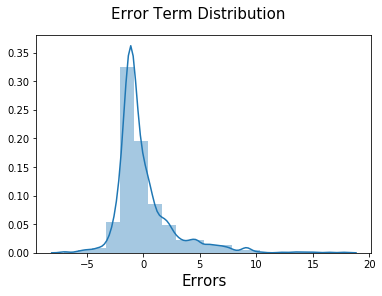

In [27]:
# Checking if the error distribution is normal
y_train_price = lr_6.predict(x_train_lm6)

# Plotting the histogram 
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Term Distribution', fontsize = 15)                  
plt.xlabel('Errors', fontsize = 15)     

In [28]:
# Running the final model on the test dataset
y_test = df_test.pop('value')
x_test = df_test

# Adding a constant variable to the test dataframe
x_test_m6 = sm.add_constant(x_test)

# Creating a dataframe by dropping variables 
x_test_m6 = x_test_m6.drop(["upperLimit", "confidenceInterval", "year", "lowerError","sampleSize","vaxView"], axis = 1)

# Making predictions using the final model
y_pred_m6 = lr_6.predict(x_test_m6)

In [29]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m6)

0.9761129427582418

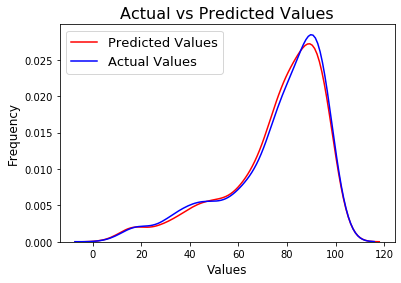

In [31]:
# Plotting the predicted values against the actual values
sb.distplot(y_pred_m6, hist = False, color = 'r', label = 'Predicted')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.legend(loc = 'upper left', fontsize = 10)

# plt.savefig('ap.png')